C:\Users\moham\AppData\Local\Temp\ipykernel_18628\103727582.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('Source', group_keys=False).apply(


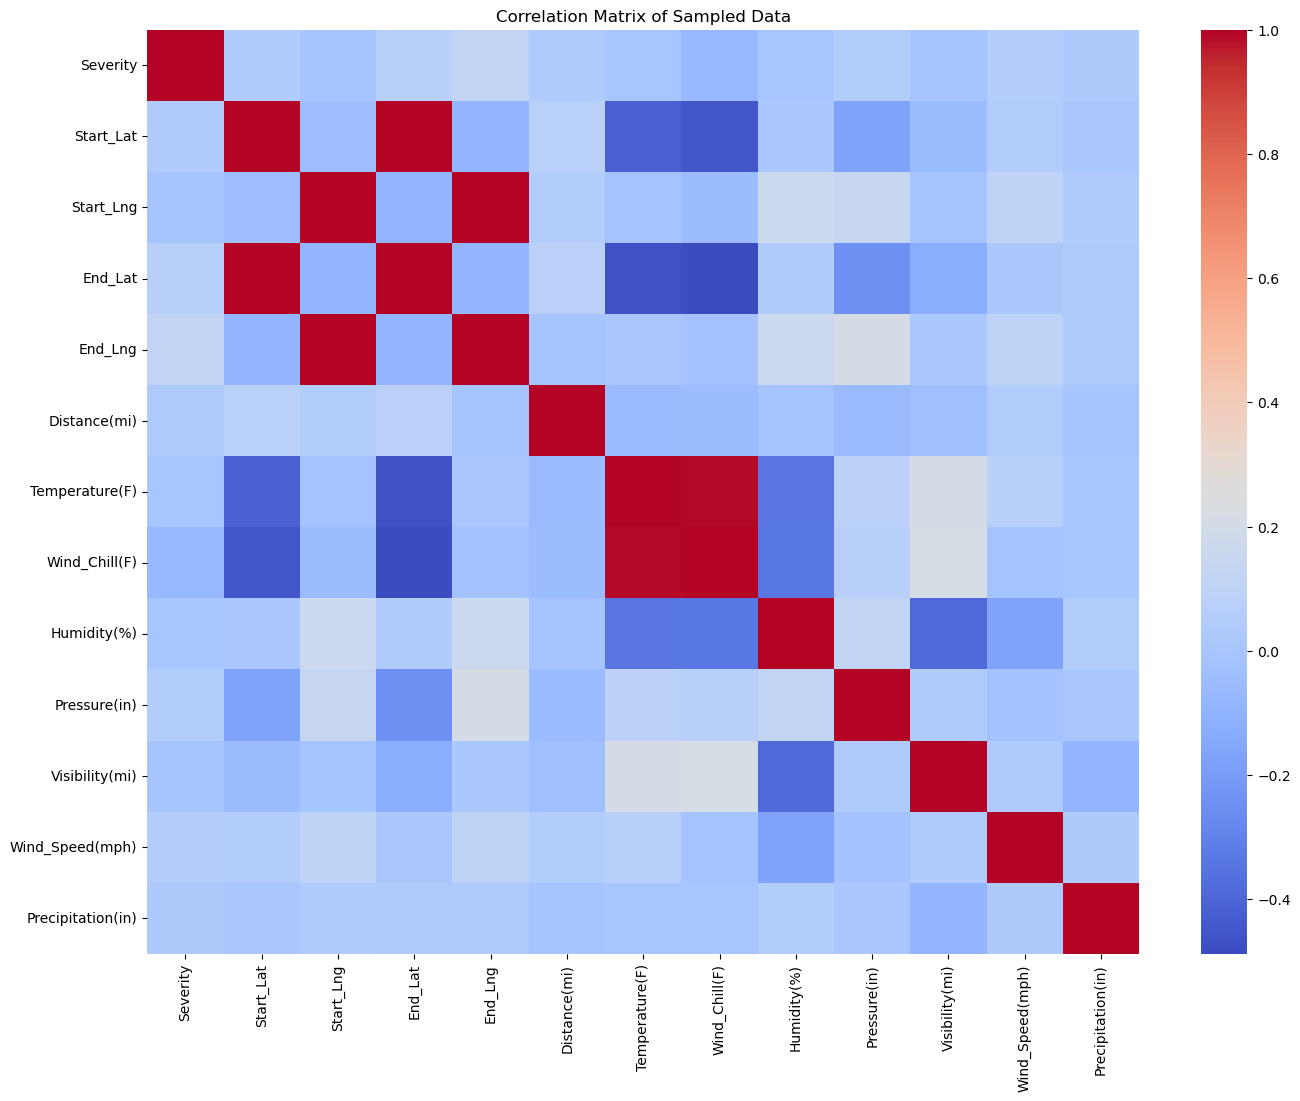

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
data_path = 'C:/Users/moham/Desktop/F21DV/US_Accidents_March23_sampled_500k.csv'
df = pd.read_csv(data_path, low_memory=False)

# Function to sample 10,000 rows while preserving data distribution
def balanced_sample(df, sample_size=10000):
    if 'Source' in df.columns:  # Use 'Severity' for stratified sampling if it makes sense
        sampled_df = df.groupby('Source', group_keys=False).apply(
            lambda x: x.sample(min(len(x), sample_size // df['Source'].nunique()), random_state=42)
        ).reset_index(drop=True)
    else:
        sampled_df = df.sample(n=sample_size, random_state=42)
    return sampled_df

# Get a balanced sample of 10,000 rows
sampled_df = balanced_sample(df, sample_size=10000)

# Save full sampled dataset with all columns for visualization
sampled_df.to_csv('sampled_full_dataset.csv', index=False)

# Keep only numeric columns for correlation analysis
sampled_numeric_df = sampled_df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = sampled_numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Sampled Data")
plt.show()

# Save numeric-only sampled dataset if needed
sampled_numeric_df.to_csv('sampled_numeric_dataset.csv', index=False)


C:\Users\moham\AppData\Local\Temp\ipykernel_18628\4013886766.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start_Time'] = pd.to_datetime(df['Start_Time'], dayfirst=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_18628\4013886766.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='viridis')


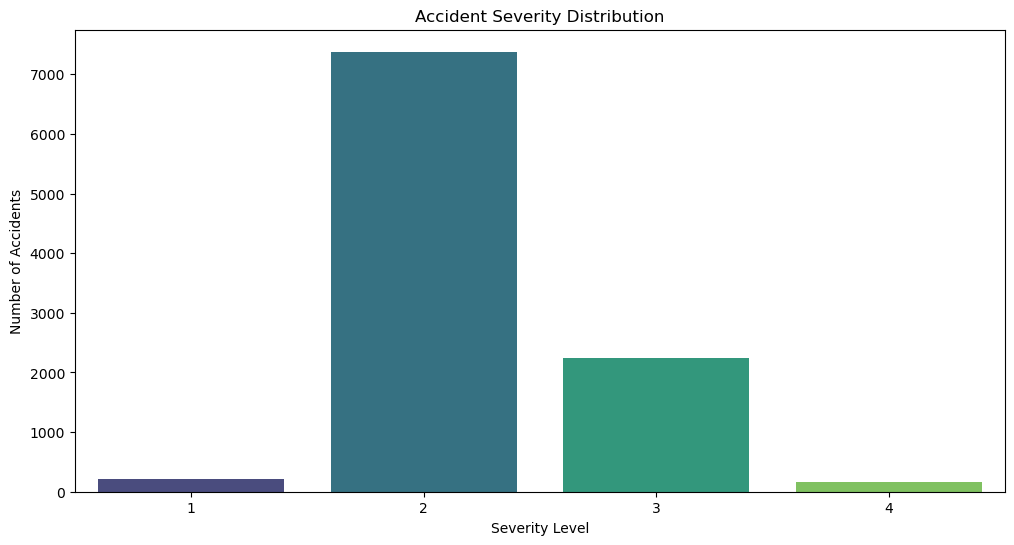

C:\Users\moham\AppData\Local\Temp\ipykernel_18628\4013886766.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='coolwarm')


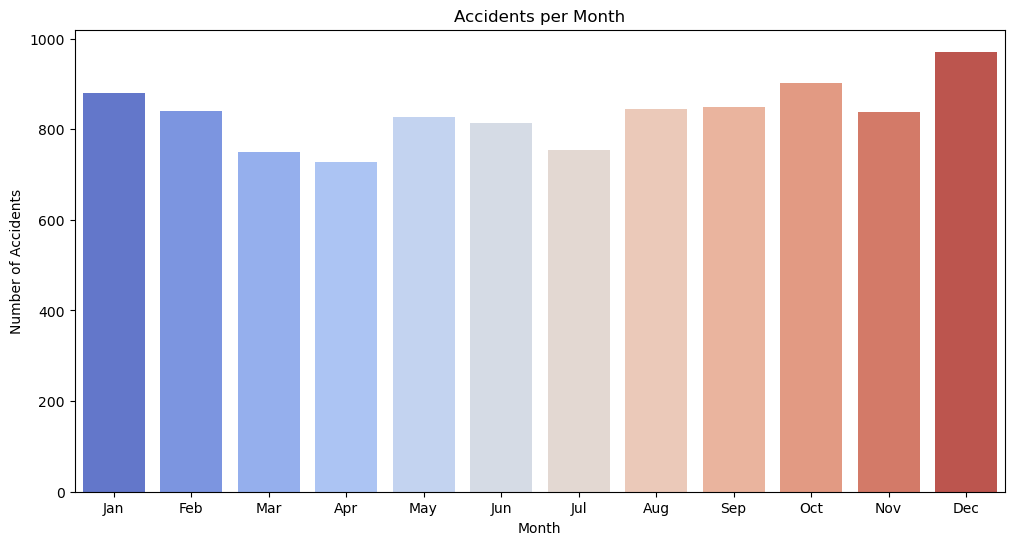

C:\Users\moham\AppData\Local\Temp\ipykernel_18628\4013886766.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='State', data=df, order=df['State'].value_counts().index, palette='magma')


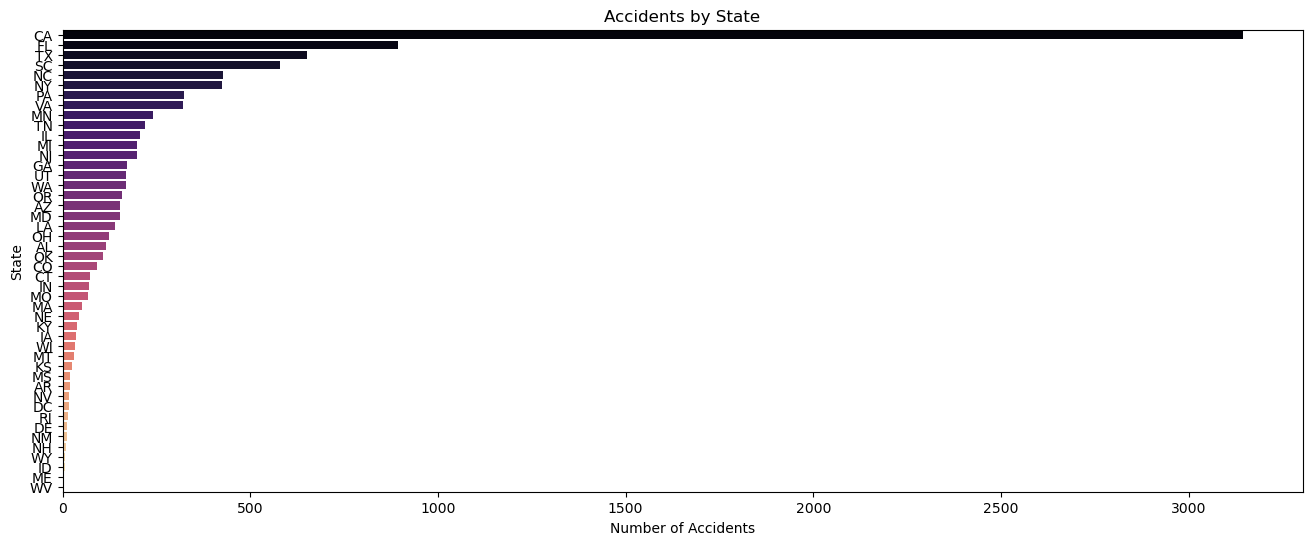

C:\Users\moham\AppData\Local\Temp\ipykernel_18628\4013886766.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_Condition', data=df, order=top_weather_conditions, palette='Blues_r')


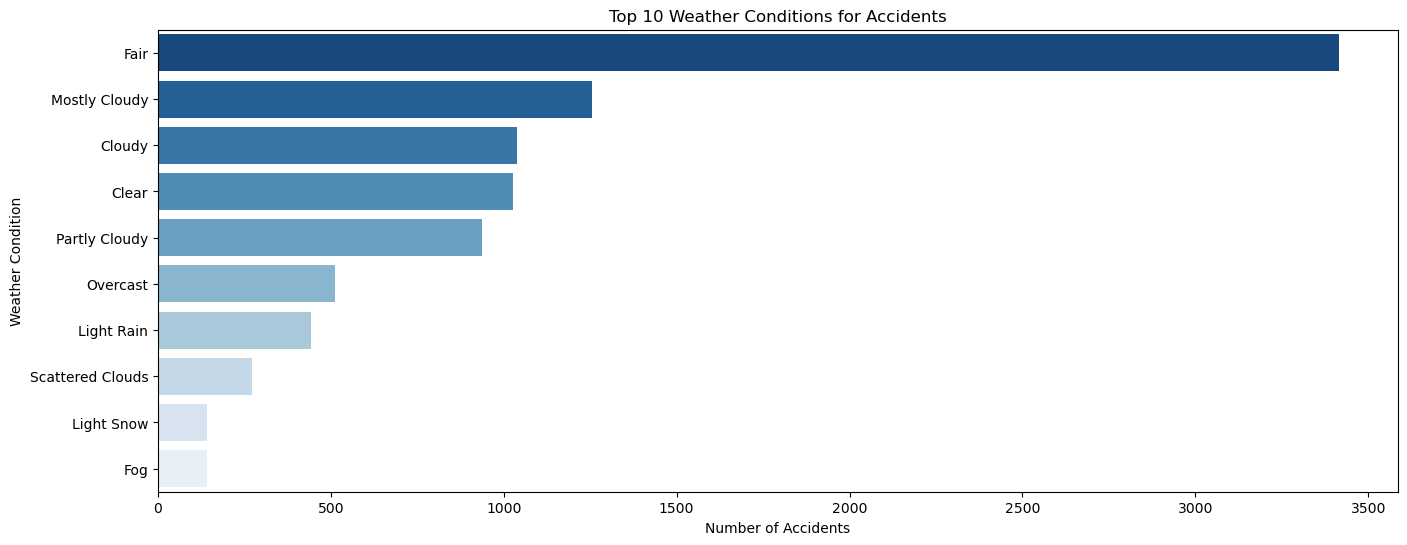

C:\Users\moham\AppData\Local\Temp\ipykernel_18628\4013886766.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sunrise_Sunset', data=df, palette='coolwarm')


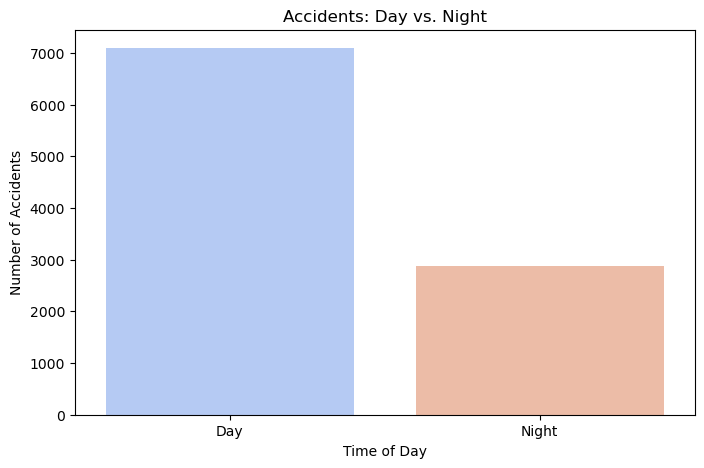

C:\Users\moham\AppData\Local\Temp\ipykernel_18628\4013886766.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='City', data=df, order=top_cities, palette='cubehelix')


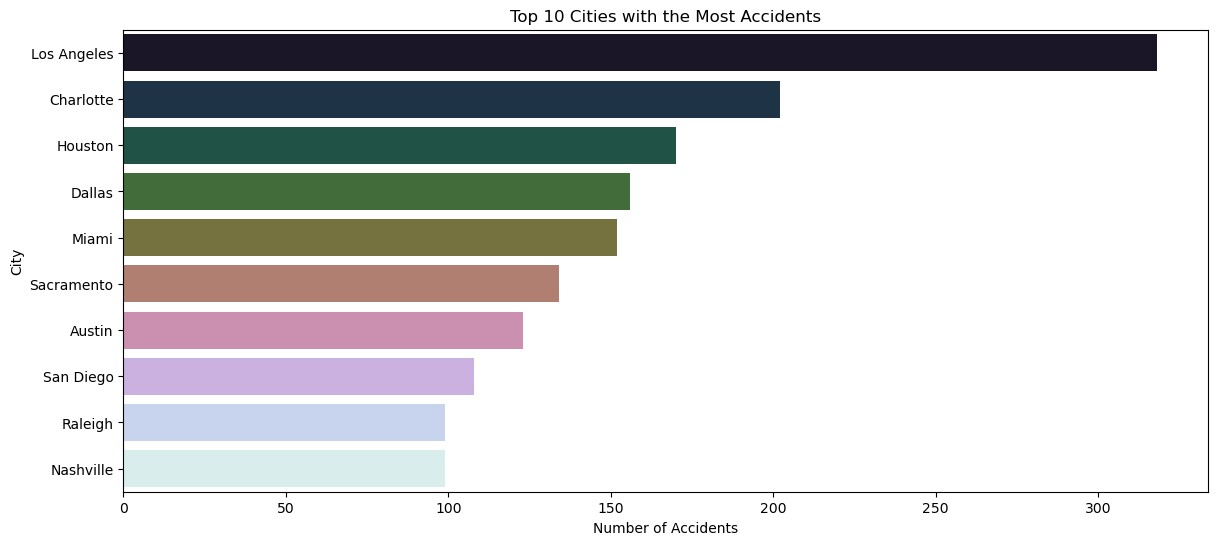

C:\Users\moham\AppData\Local\Temp\ipykernel_18628\4013886766.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


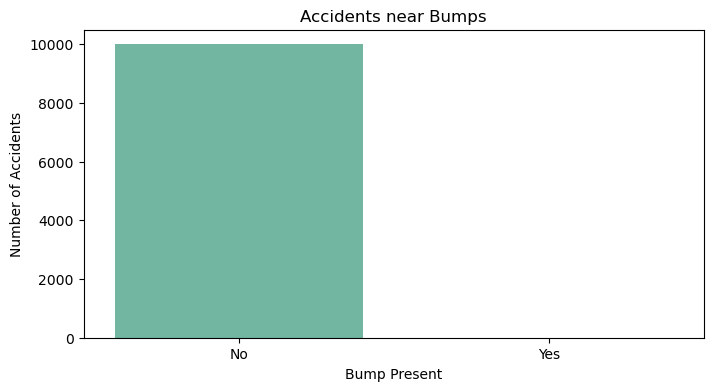

C:\Users\moham\AppData\Local\Temp\ipykernel_18628\4013886766.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


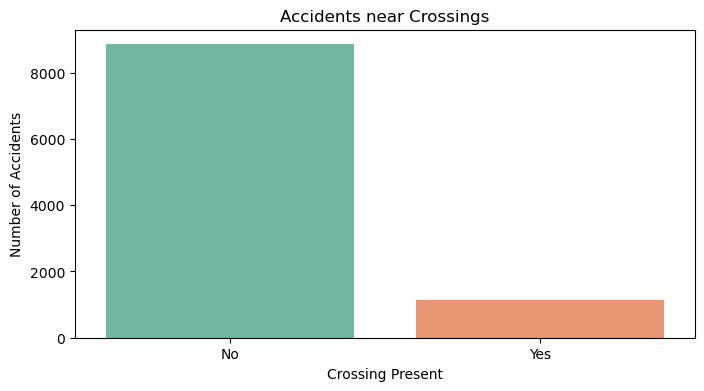

C:\Users\moham\AppData\Local\Temp\ipykernel_18628\4013886766.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


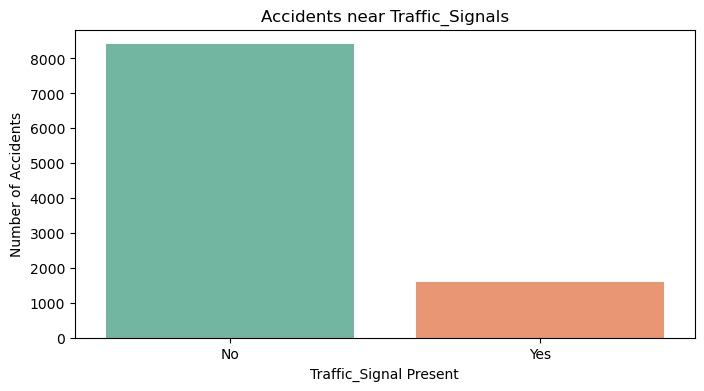

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the sampled dataset
data_path = 'sampled_full_dataset.csv'  # Update with your actual filename
df = pd.read_csv(data_path, low_memory=False)

# Convert date columns to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], dayfirst=True)

# Set a larger figure size for better visualization
plt.figure(figsize=(12, 6))

# --- 1. Accident Severity Distribution ---
sns.countplot(x='Severity', data=df, palette='viridis')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()

# --- 2. Accidents Over Time ---
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Hour'] = df['Start_Time'].dt.hour

# Accidents by Month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df, palette='coolwarm')
plt.title("Accidents per Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

# --- 3. Accidents by State ---
plt.figure(figsize=(16, 6))
sns.countplot(y='State', data=df, order=df['State'].value_counts().index, palette='magma')
plt.title("Accidents by State")
plt.ylabel("State")
plt.xlabel("Number of Accidents")
plt.show()

# --- 4. Weather Conditions & Accidents ---
plt.figure(figsize=(16, 6))
top_weather_conditions = df['Weather_Condition'].value_counts().nlargest(10).index
sns.countplot(y='Weather_Condition', data=df, order=top_weather_conditions, palette='Blues_r')
plt.title("Top 10 Weather Conditions for Accidents")
plt.ylabel("Weather Condition")
plt.xlabel("Number of Accidents")
plt.show()

# --- 5. Accidents by Time of Day (Using Sunrise_Sunset) ---
plt.figure(figsize=(8, 5))
sns.countplot(x='Sunrise_Sunset', data=df, palette='coolwarm')
plt.title("Accidents: Day vs. Night")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.xticks([0, 1], ["Day", "Night"])
plt.show()


# --- 6. Top Cities with Most Accidents ---
plt.figure(figsize=(14, 6))
top_cities = df['City'].value_counts().nlargest(10).index
sns.countplot(y='City', data=df, order=top_cities, palette='cubehelix')
plt.title("Top 10 Cities with the Most Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("City")
plt.show()

# --- 7. Impact of Road Features (Bumps, Traffic Signals, Crossings) ---
road_features = ['Bump', 'Crossing', 'Traffic_Signal']

for feature in road_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f"Accidents near {feature}s")
    plt.xlabel(f"{feature} Present")
    plt.ylabel("Number of Accidents")
    plt.xticks([0, 1], ["No", "Yes"])
    plt.show()


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'sampled_full_dataset.csv'  # Update with your actual file path
df = pd.read_csv(data_path, low_memory=False)

# --- 1. DATA EXPLORATION ---

# Display basic info
print("Dataset Overview:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nMissing Values:\n", missing_values)

# --- 2. REMOVE UNNECESSARY FEATURES ---
columns_to_remove = [
    'ID', 'Source', 'End_Time', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
    'Street', 'Zipcode', 'Country', 'Airport_Code', 'Weather_Timestamp',
    'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Precipitation(in)', 'Wind_Chill(F)'
]

df.drop(columns=columns_to_remove, inplace=True)


# --- 3. DATA CLEANING ---

# Convert date columns to datetime (with dayfirst=True for DD/MM/YYYY format)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], dayfirst=True)

# Fill missing values for numerical columns
num_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop remaining rows with NaN values
df.dropna(inplace=True)


# --- 4. OUTLIER HANDLING USING IQR ---

# def remove_outliers(df, column):
#    """ Removes outliers using the IQR method """
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df

# # Apply outlier removal on numerical columns
# for col in num_cols:
#     df = remove_outliers(df, col)

# --- 5. ENCODING CATEGORICAL VARIABLES ---

# Encode categorical variables (One-Hot Encoding for 'Sunrise_Sunset', 'Weather_Condition')
# df = pd.get_dummies(df, columns=['Sunrise_Sunset', 'Weather_Condition'], drop_first=True)

# --- 6. FEATURE ENGINEERING ---

# Extract time-based features
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Drop 'Start_Time' since we extracted useful time-based features
df.drop(columns=['Start_Time'], inplace=True)

# Save the cleaned dataset
df.to_csv('cleaned_accidents_dataset.csv', index=False)

print("\ Data Cleaning and Preprocessing Completed!")
print("Final dataset shape:", df.shape, df.info)


<>:86: SyntaxWarning: invalid escape sequence '\ '
<>:86: SyntaxWarning: invalid escape sequence '\ '
C:\Users\moham\AppData\Local\Temp\ipykernel_18628\1128257082.py:86: SyntaxWarning: invalid escape sequence '\ '
  print("\ Data Cleaning and Preprocessing Completed!")


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     9999 non-null   object 
 1   Source                 9999 non-null   object 
 2   Severity               9999 non-null   int64  
 3   Start_Time             9999 non-null   object 
 4   End_Time               9999 non-null   object 
 5   Start_Lat              9999 non-null   float64
 6   Start_Lng              9999 non-null   float64
 7   End_Lat                3333 non-null   float64
 8   End_Lng                3333 non-null   float64
 9   Distance(mi)           9999 non-null   float64
 10  Description            9999 non-null   object 
 11  Street                 9987 non-null   object 
 12  City                   9999 non-null   object 
 13  County                 9999 non-null   object 
 14  State                  9999 non-null  

C:\Users\moham\AppData\Local\Temp\ipykernel_18628\1128257082.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start_Time'] = pd.to_datetime(df['Start_Time'], dayfirst=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_18628\1128257082.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_18628\

\ Data Cleaning and Preprocessing Completed!
Final dataset shape: (9999, 32) <bound method DataFrame.info of       Severity  Start_Lat   Start_Lng       City          County State  \
0            2  40.804609  -73.261787  Brentwood         Suffolk    NY   
1            2  34.024250 -117.335300     Colton  San Bernardino    CA   
2            2  32.456761 -111.209457     Marana            Pima    AZ   
3            2  35.667218  -78.798446       Apex            Wake    NC   
4            2  25.807342  -80.206037      Miami      Miami-Dade    FL   
...        ...        ...         ...        ...             ...   ...   
9994         3  40.813362  -73.931404      Bronx           Bronx    NY   
9995         2  34.774578 -118.536873  Lancaster     Los Angeles    CA   
9996         3  38.540649 -121.734970      Davis            Yolo    CA   
9997         1  36.267330  -86.746223    Madison        Davidson    TN   
9998         1  33.864552  -79.690353  Lake City        Florence    SC   

  